In [258]:
import warnings
warnings.filterwarnings('ignore')

# Question 1

1.1

In [259]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO 
import matplotlib.pyplot as plt
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

In [260]:
from six import StringIO

In [261]:
stocks = pd.read_csv('SP20-2017-2021.csv', index_col=0).dropna()
stocks.head()

,CHK,AMD,LNT,FCX,VRTX,WMB,INCY,NFLX,MRO,MU,MCD,BRK-B,SO,T,KO,PG,JNJ,WM,RSG,PEP
Date,,,,,,,,,,,,,,,,,,,,
2021-02-10,44.391636,92.349998,48.087662,31.039978,212.529999,21.733746,85.169998,563.590027,8.991327,82.235046,210.763016,239.919998,59.088921,27.040606,48.456974,125.828545,163.775208,112.275978,89.450478,134.695145
2021-02-11,42.230759,92.660004,47.686279,30.791580,210.500000,21.228754,84.989998,557.590027,8.655018,86.359291,210.635223,239.759995,59.438042,27.173206,49.140846,125.936493,163.038849,111.811829,90.211380,132.024719
2021-02-12,41.944618,93.769997,47.275108,31.030041,213.979996,21.762329,84.330002,556.520020,8.872630,87.887154,210.271484,242.460007,58.899033,27.277388,49.521854,125.239731,163.549393,111.841461,90.181740,130.948730
2021-02-16,42.970787,91.459999,46.814983,32.689350,210.270004,21.829025,82.129997,557.280029,9.478032,87.617523,211.382324,245.279999,58.115017,27.438400,49.111538,125.534134,162.066864,111.199532,89.312126,131.447617
2021-02-17,43.671341,89.940002,47.216366,33.931351,214.850006,22.000534,83.769997,551.340027,9.507807,85.929886,209.829117,245.250000,58.085617,28.006681,48.974762,126.064072,162.646118,110.814392,89.015678,131.525864


In [262]:
returns = np.log(stocks/stocks.shift(1)).dropna(how="any")
returns.head()

,CHK,AMD,LNT,FCX,VRTX,WMB,INCY,NFLX,MRO,MU,MCD,BRK-B,SO,T,KO,PG,JNJ,WM,RSG,PEP
Date,,,,,,,,,,,,,,,,,,,,
2021-02-11,-0.049902,0.003351,-0.008382,-0.008035,-0.009597,-0.023510,-0.002116,-0.010703,-0.038121,0.048935,-0.000607,-0.000667,0.005891,0.004892,0.014014,0.000858,-0.004506,-0.004143,0.008470,-0.020025
2021-02-12,-0.006799,0.011908,-0.008660,0.007715,0.016397,0.024824,-0.007796,-0.001921,0.024832,0.017537,-0.001728,0.011198,-0.009110,0.003827,0.007723,-0.005548,0.003127,0.000265,-0.000329,-0.008183
2021-02-16,0.024170,-0.024943,-0.009781,0.052094,-0.017490,0.003060,-0.026434,0.001365,0.066005,-0.003073,0.005269,0.011564,-0.013401,0.005885,-0.008320,0.002348,-0.009106,-0.005756,-0.009690,0.003803
2021-02-17,0.016172,-0.016759,0.008537,0.037290,0.021548,0.007826,0.019772,-0.010716,0.003137,-0.019449,-0.007375,-0.000122,-0.000506,0.020500,-0.002789,0.004213,0.003568,-0.003470,-0.003325,0.000595
2021-02-18,-0.028881,-0.014560,0.007848,-0.000293,-0.023642,-0.036608,-0.026859,-0.005675,-0.049208,0.028526,0.009233,-0.007161,0.009738,-0.011565,0.012686,0.008295,0.000483,0.010814,0.018042,0.006745


In [263]:
vols = returns.std().sort_values()
vols

KO       0.008009
JNJ      0.008355
PG       0.008599
PEP      0.008631
SO       0.009075
MCD      0.009132
WM       0.009751
BRK-B    0.009786
RSG      0.010043
T        0.010926
LNT      0.011296
WMB      0.013904
VRTX     0.015064
NFLX     0.016465
INCY     0.017455
CHK      0.022206
MU       0.023886
AMD      0.024104
FCX      0.031717
MRO      0.034115
dtype: float64

In [264]:
MRO = stocks[['MRO']]
MRO = MRO.rename(columns={'MRO': 'MRO_PRICE'})

In [265]:
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

In [266]:
MRO['RSI'] = get_rsi(stocks.MRO, 14)  ## 14 as the lookback period
MRO = MRO.dropna()

In [267]:
MRO.head()

,MRO_PRICE,RSI
Date,,
2021-02-17,9.507807,74.326975
2021-02-18,9.051272,50.605267
2021-02-19,9.378786,60.375482
2021-02-22,10.123134,73.301031
2021-02-23,11.075900,81.582548


1.2

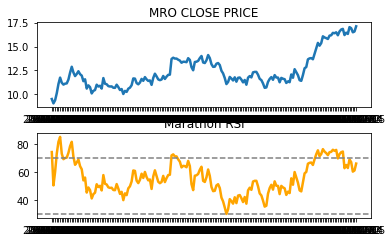

In [268]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(MRO['MRO_PRICE'], linewidth = 2.5)
ax1.set_title('MRO CLOSE PRICE')
ax2.plot(MRO['RSI'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('Marathon RSI')
plt.show()

1.3

In [269]:
def implement_rsi_strategy(prices, rsi):
    buy_price = []
    sell_price = []
    rsi_signal = []
    
    for i in range(1,len(rsi)):
        if i == len(rsi):
            break
        else:
            if rsi[i-1] > 30 and rsi[i-1] < 70 and rsi[i] >70:  ## sell signal
                buy_price.append(0)
                sell_price.append(prices[i])
                rsi_signal.append(-1)
            elif rsi[i-1] > 30 and rsi[i] < 30:          ## buy signal
                buy_price.append(price[i])
                sell_price.append(0)
                rsi_signal.append(1)
            else:
                buy_price.append(0)
                sell_price.append(0)
                rsi_signal.append(0)
        
    strategy_df = pd.DataFrame({'buy_price':buy_price, 'sell_price':sell_price, 'rsi_signal': rsi_signal})
    
    return strategy_df   

In [270]:
MRO['MRO_PRICE']

Date
2021-02-17     9.507807
2021-02-18     9.051272
2021-02-19     9.378786
2021-02-22    10.123134
2021-02-23    11.075900
                ...    
2021-11-01    17.030001
2021-11-02    16.920000
2021-11-03    16.490000
2021-11-04    16.570000
2021-11-05    17.115000
Name: MRO_PRICE, Length: 184, dtype: float64

In [271]:
MRO['RSI']

Date
2021-02-17    74.326975
2021-02-18    50.605267
2021-02-19    60.375482
2021-02-22    73.301031
2021-02-23    81.582548
                ...    
2021-11-01    69.025401
2021-11-02    67.184348
2021-11-03    60.402183
2021-11-04    61.187203
2021-11-05    66.115552
Name: RSI, Length: 184, dtype: float64

In [272]:
strategy = implement_rsi_strategy(MRO['MRO_PRICE'], MRO['RSI'])
MRO_1 = pd.concat([MRO.reset_index(),strategy], axis = 1).dropna()
#MRO_2=MRO_1.dropna()

In [273]:
strategy

,buy_price,sell_price,rsi_signal
0,0,0.000000,0
1,0,0.000000,0
2,0,10.123134,-1
3,0,0.000000,0
4,0,0.000000,0
...,...,...,...
178,0,0.000000,0
179,0,0.000000,0
180,0,0.000000,0
181,0,0.000000,0


In [274]:
MRO_1

,Date,MRO_PRICE,RSI,buy_price,sell_price,rsi_signal
0,2021-02-17,9.507807,74.326975,0.0,0.000000,0.0
1,2021-02-18,9.051272,50.605267,0.0,0.000000,0.0
2,2021-02-19,9.378786,60.375482,0.0,10.123134,-1.0
3,2021-02-22,10.123134,73.301031,0.0,0.000000,0.0
4,2021-02-23,11.075900,81.582548,0.0,0.000000,0.0
...,...,...,...,...,...,...
178,2021-10-29,16.320000,62.938430,0.0,0.000000,0.0
179,2021-11-01,17.030001,69.025401,0.0,0.000000,0.0
180,2021-11-02,16.920000,67.184348,0.0,0.000000,0.0
181,2021-11-03,16.490000,60.402183,0.0,0.000000,0.0


In [275]:
MRO_1.iloc[-182:]['rsi_signal'][MRO_1.rsi_signal==-1]

2     -1.0
7     -1.0
71    -1.0
158   -1.0
172   -1.0
Name: rsi_signal, dtype: float64

1.4

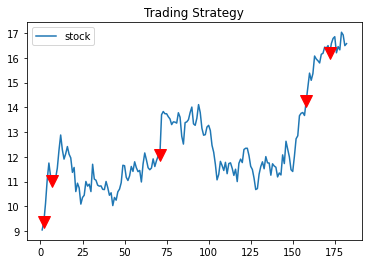

In [276]:
plt.plot(MRO_1.iloc[-182:]['MRO_PRICE'], label = 'stock')
plt.plot(MRO_1[-182:].loc[MRO_1.rsi_signal==-1].index, MRO_1.iloc[-182:]['MRO_PRICE'][MRO_1.rsi_signal==-1],'v',color = 'r', markersize = 12)
plt.plot(MRO_1[-182:].loc[MRO_1.rsi_signal==1].index, MRO_1.iloc[-182:]['MRO_PRICE'][MRO_1.rsi_signal==1],'^',color = 'g', markersize = 12)
plt.title('Trading Strategy')
plt.legend()

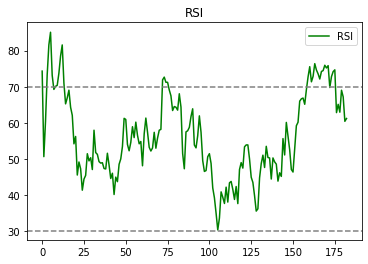

In [277]:
plt.plot(MRO_1['RSI'],label='RSI',color='g')
plt.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.title('RSI')
plt.legend()

1.5

In [278]:
position = []
signal = MRO_1['rsi_signal']
for i in range(len(signal)):
    if signal[i] == 1:
        position.append(1)
    elif signal[i] == -1:
        position.append(0)
    else:
        position.append('-')

posit = pd.DataFrame({'position':position})

#generate acutal position values
actual_position_value = []

price = MRO_1['MRO_PRICE']
pos = posit['position']

for i in range(len(pos)):
    if pos[i] == 0:
        value = price[i]*pos[i]
        actual_position_value.append(value)
    elif pos[i] == 1:
        value = price[i]*pos[i]
        actual_position_value.append(value)
    else:
        actual_position_value.append('-')

APV = pd.DataFrame({'APV':actual_position_value})

In [279]:
## add position and actual positon value to dataframe
MRO_2 = pd.concat([MRO_1,posit,APV], axis = 1)
MRO_2

,Date,MRO_PRICE,RSI,buy_price,sell_price,rsi_signal,position,APV
0,2021-02-17,9.507807,74.326975,0.0,0.000000,0.0,-,-
1,2021-02-18,9.051272,50.605267,0.0,0.000000,0.0,-,-
2,2021-02-19,9.378786,60.375482,0.0,10.123134,-1.0,0,0.0
3,2021-02-22,10.123134,73.301031,0.0,0.000000,0.0,-,-
4,2021-02-23,11.075900,81.582548,0.0,0.000000,0.0,-,-
...,...,...,...,...,...,...,...,...
178,2021-10-29,16.320000,62.938430,0.0,0.000000,0.0,-,-
179,2021-11-01,17.030001,69.025401,0.0,0.000000,0.0,-,-
180,2021-11-02,16.920000,67.184348,0.0,0.000000,0.0,-,-
181,2021-11-03,16.490000,60.402183,0.0,0.000000,0.0,-,-


# Question2

2.1

In [280]:
#pip install pandas-ta      ## install pandaa-ta
import pandas_ta as ta
#pd.DataFrame().ta.indicators()    ## List of all indicators
#help(ta.rsi)

In [281]:
stocks = pd.read_csv('all_stocks_10_2015_2020.csv', index_col = 0).dropna()
stocks.head()

,GOOGL,TSLA,FB,AMZN,AAPL,MSFT,VOD,ADBE,NVDA,CRM
Date,,,,,,,,,,
2015-01-02,529.549988,43.862000,78.449997,308.519989,24.745998,41.193832,23.353846,72.339996,4.840063,59.240002
2015-01-05,519.460022,42.018002,77.190002,302.190002,24.048861,40.815022,22.530323,71.980003,4.758315,58.169998
2015-01-06,506.640015,42.256001,76.150002,295.290008,24.051125,40.215969,22.386202,70.529999,4.614049,57.200001
2015-01-07,505.149994,42.189999,76.150002,298.420013,24.388374,40.726925,22.537180,71.110001,4.602028,56.930000
2015-01-08,506.910004,42.124001,78.180000,300.459992,25.325432,41.925045,23.326395,72.919998,4.775145,58.590000


In [282]:
returns = np.log(stocks/stocks.shift(1)).dropna(how="any")
returns.tail()

,GOOGL,TSLA,FB,AMZN,AAPL,MSFT,VOD,ADBE,NVDA,CRM
Date,,,,,,,,,,
2020-11-24,0.020817,0.062272,0.031139,0.006328,0.011528,0.017690,0.028273,0.004527,-0.013967,0.012344
2020-11-25,0.000130,0.032977,-0.004814,0.021263,0.007439,0.000047,-0.005949,0.015824,0.021152,-0.055248
2020-11-27,0.012892,0.020281,0.008023,0.003219,0.004815,0.006339,0.005355,0.014677,0.002000,0.003276
2020-11-30,-0.018423,-0.031493,-0.003028,-0.008580,0.020880,-0.005404,-0.016153,0.003014,0.010520,-0.007418
2020-12-01,0.023079,0.029785,0.034004,0.016293,0.030362,0.009947,0.015560,0.001420,-0.000859,-0.018270


In [283]:
return_train=returns['2015-01-05':'2019-12-31']
return_test=returns['2020/01/01':'2020/12/1']

In [284]:
vols = returns.std().sort_values()
vols

GOOGL    0.016902
VOD      0.017416
MSFT     0.017603
AAPL     0.018708
AMZN     0.019454
ADBE     0.019562
FB       0.020247
CRM      0.021340
NVDA     0.028708
TSLA     0.034648
dtype: float64

In [285]:
sr=[]
for i in returns.columns:
    mean= returns[i].mean()
    std = np.sqrt(returns[i].var())
    sr = mean/std
    print(sr)

0.04851307014623329
0.050205580512221154
0.042970760321206475
0.08096642175096692
0.05726055956234657
0.06293709119822254
-0.014951029428643271
0.06490832984981651
0.07764726024494609
0.04420573909526736


In [286]:
def features(stock):
    
    EMA14 = ta.ema(stock, 14)
    EMA22 = ta.ema(stock, 22)
    RSI = ta.rsi(stock)
    PPO = ta.ppo(stock)
    MACD = ta.macd(stock)
    CMO = ta.cmo(stock)
    lRETURN = ta.log_return(stock)
    
    new_df = pd.concat([stock, RSI, EMA14, EMA22, PPO, MACD, CMO, lRETURN], axis = 1)
    
    return new_df.dropna()

In [287]:
TSLA_feature=features(stocks['TSLA'])
TSLA_feature = TSLA_feature.rename(columns={'TSLA': 'TSLA_PRICE'})
TSLA_feature
#TSLA = TSLA.rename(columns={'TSLA': 'TSLA_PRICE'})
#TSLA.head()

,TSLA_PRICE,RSI_14,EMA_14,EMA_22,PPO_12_26_9,PPOh_12_26_9,PPOs_12_26_9,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,CMO_14,LOGRET_1
Date,,,,,,,,,,,,
2015-02-20,43.422001,55.053334,42.028091,41.795567,2.857108,-0.012678,2.869785,0.405389,-0.120502,0.525891,10.106668,0.025187
2015-02-23,41.467999,45.409401,41.953412,41.767083,2.125763,-0.595218,2.720981,0.336177,-0.151772,0.487949,-9.181197,-0.046044
2015-02-24,40.821999,42.743566,41.802557,41.684901,1.215928,-1.204042,2.419970,0.226587,-0.209089,0.435676,-14.512868,-0.015701
2015-02-25,40.751999,42.452734,41.662483,41.603779,0.470482,-1.559591,2.030073,0.132560,-0.242493,0.375053,-15.094532,-0.001716
2015-02-26,41.438000,46.308325,41.632552,41.589364,-0.223786,-1.803087,1.579301,0.112105,-0.210359,0.322463,-7.383349,0.016693
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24,555.380005,75.791202,468.412498,454.013265,4.671570,3.210724,1.460847,24.757112,13.848279,10.908833,51.582404,0.062272
2020-11-25,574.000000,77.784829,482.490832,464.446894,6.168138,3.765833,2.402305,30.889244,15.984328,14.904915,55.569658,0.032977
2020-11-27,585.760010,78.963152,496.260056,474.995861,7.945076,4.434217,3.510859,36.279727,17.099849,19.179878,57.926304,0.020281


In [288]:
TSLA_returns=returns[['TSLA']]
TSLA_returns = TSLA_returns.rename(columns={'TSLA': 'TSLA_RETURN'})
TSLA_returns.head()

,TSLA_RETURN
Date,
2015-01-05,-0.042950
2015-01-06,0.005648
2015-01-07,-0.001563
2015-01-08,-0.001566
2015-01-09,-0.018981


In [289]:
TSLA_feature['TSLA_RETURN']=TSLA_returns
TSLA_feature

,TSLA_PRICE,RSI_14,EMA_14,EMA_22,PPO_12_26_9,PPOh_12_26_9,PPOs_12_26_9,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,CMO_14,LOGRET_1,TSLA_RETURN
Date,,,,,,,,,,,,,
2015-02-20,43.422001,55.053334,42.028091,41.795567,2.857108,-0.012678,2.869785,0.405389,-0.120502,0.525891,10.106668,0.025187,0.025187
2015-02-23,41.467999,45.409401,41.953412,41.767083,2.125763,-0.595218,2.720981,0.336177,-0.151772,0.487949,-9.181197,-0.046044,-0.046044
2015-02-24,40.821999,42.743566,41.802557,41.684901,1.215928,-1.204042,2.419970,0.226587,-0.209089,0.435676,-14.512868,-0.015701,-0.015701
2015-02-25,40.751999,42.452734,41.662483,41.603779,0.470482,-1.559591,2.030073,0.132560,-0.242493,0.375053,-15.094532,-0.001716,-0.001716
2015-02-26,41.438000,46.308325,41.632552,41.589364,-0.223786,-1.803087,1.579301,0.112105,-0.210359,0.322463,-7.383349,0.016693,0.016693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24,555.380005,75.791202,468.412498,454.013265,4.671570,3.210724,1.460847,24.757112,13.848279,10.908833,51.582404,0.062272,0.062272
2020-11-25,574.000000,77.784829,482.490832,464.446894,6.168138,3.765833,2.402305,30.889244,15.984328,14.904915,55.569658,0.032977,0.032977
2020-11-27,585.760010,78.963152,496.260056,474.995861,7.945076,4.434217,3.510859,36.279727,17.099849,19.179878,57.926304,0.020281,0.020281


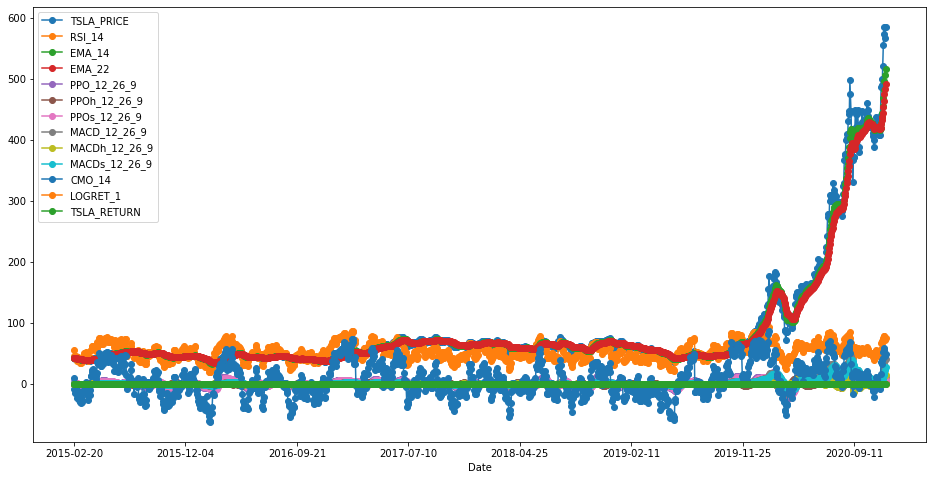

In [290]:
TSLA_feature=TSLA_feature.dropna()
TSLA_feature.plot(style="-o", figsize=(16,8));


(1) Design a simple trading rule:when pt > pt−1 and then buy; otherwise sell. Use the Random Forest algorihtm to build a classifier on the 7 features to forecast the next day price trend. Use the same rule to trade on the 10 stocks, and select a highest performing stock. 

In [291]:
from sklearn.ensemble import RandomForestClassifier

In [292]:
TSLA_feature['TSLA_PRICE'].index

Index(['2015-02-20', '2015-02-23', '2015-02-24', '2015-02-25', '2015-02-26',
       '2015-02-27', '2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05',
       ...
       '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-23',
       '2020-11-24', '2020-11-25', '2020-11-27', '2020-11-30', '2020-12-01'],
      dtype='object', name='Date', length=1457)

In [293]:
# X is the input variable
X = TSLA_feature[['TSLA_RETURN','TSLA_PRICE', 'RSI_14', 'EMA_14', 'EMA_22', 'PPO_12_26_9',
          'PPOh_12_26_9', 'PPOs_12_26_9', 'MACD_12_26_9', 'MACDh_12_26_9',
          'MACDs_12_26_9', 'CMO_14', 'LOGRET_1']]

In [294]:
X.head()

,TSLA_RETURN,TSLA_PRICE,RSI_14,EMA_14,EMA_22,PPO_12_26_9,PPOh_12_26_9,PPOs_12_26_9,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,CMO_14,LOGRET_1
Date,,,,,,,,,,,,,
2015-02-20,0.025187,43.422001,55.053334,42.028091,41.795567,2.857108,-0.012678,2.869785,0.405389,-0.120502,0.525891,10.106668,0.025187
2015-02-23,-0.046044,41.467999,45.409401,41.953412,41.767083,2.125763,-0.595218,2.720981,0.336177,-0.151772,0.487949,-9.181197,-0.046044
2015-02-24,-0.015701,40.821999,42.743566,41.802557,41.684901,1.215928,-1.204042,2.419970,0.226587,-0.209089,0.435676,-14.512868,-0.015701
2015-02-25,-0.001716,40.751999,42.452734,41.662483,41.603779,0.470482,-1.559591,2.030073,0.132560,-0.242493,0.375053,-15.094532,-0.001716
2015-02-26,0.016693,41.438000,46.308325,41.632552,41.589364,-0.223786,-1.803087,1.579301,0.112105,-0.210359,0.322463,-7.383349,0.016693


In [295]:
# Y is the target or output variable
y = np.where(TSLA_feature['TSLA_PRICE'].shift(-1) >TSLA_feature['TSLA_PRICE'], 1, -1)
y

array([-1, -1, -1, ..., -1,  1, -1])

In [296]:
# Total dataset length
dataset_length = TSLA_feature.shape[0]

# Training dataset length
split = int(dataset_length * 0.75)
split

1092

In [297]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1092, 13) (365, 13)
(1092,) (365,)


In [298]:
clf = RandomForestClassifier(random_state=5)

In [299]:
# Create the model on train dataset
model = clf.fit(X_train, y_train)

In [300]:
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  44.657534246575345


In [301]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

          -1       0.43      0.82      0.56       159
           1       0.53      0.16      0.24       206

    accuracy                           0.45       365
   macro avg       0.48      0.49      0.40       365
weighted avg       0.49      0.45      0.38       365



In [302]:
data['strategy_returns'] = TSLA_feature['TSLA_PRICE'].pct_change().shift(-1) * model.predict(X)

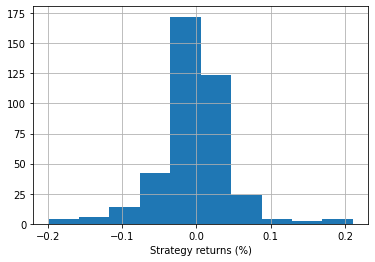

In [303]:
%matplotlib inline
import matplotlib.pyplot as plt
data.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()

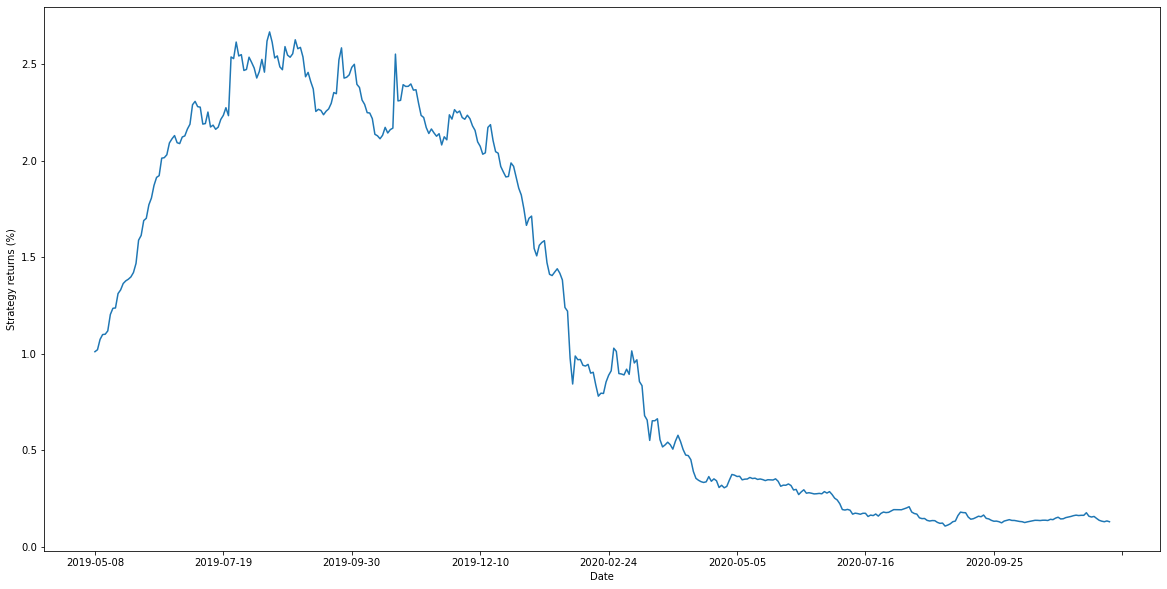

In [304]:
plt.figure(figsize=(20,10))
(data.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.show()

In [305]:
SR=data.strategy_returns[split:].mean()/data.strategy_returns[split:].std()
SR 

-0.0799925201841369

In [306]:
## 10 selected stocks ticker
tickers = ['GOOGL', 'TSLA', 'FB', 'AMZN', 'AAPL', 'MSFT', 'VOD', 'ADBE', 'NVDA','CRM']

## get 7 features for each stock & change the stock price to 'price'
GOOGL=features(stocks ['GOOGL']).rename(columns = {'GOOGL':'PRICE'})
TSLA=features(stocks ['TSLA']).rename(columns = {'TSLA':'PRICE'})
FB=features(stocks ['FB']).rename(columns = {'FB':'PRICE'})
AMZN=features(stocks ['AMZN']).rename(columns = {'AMZN':'PRICE'})
AAPL=features(stocks ['AAPL']).rename(columns = {'AAPL':'PRICE'})
MSFT=features(stocks ['MSFT']).rename(columns = {'MSFT':'PRICE'})
VOD=features(stocks ['VOD']).rename(columns = {'VOD':'PRICE'})
ADBE=features(stocks ['ADBE']).rename(columns = {'ADBE':'PRICE'})
NVDA=features(stocks ['NVDA']).rename(columns = {'NVDA':'PRICE'})
CRM=features(stocks ['CRM']).rename(columns = {'CRM':'PRICE'})

## new dataset
portfolio = {'GOOGL':GOOGL,'TSLA':TSLA,'FB':FB,'AMZN':AMZN,'AAPL':AAPL,
             'MSFT':MSFT,'VOD':VOD,'ADBE':ADBE,'NVDA':NVDA,'CRM':CRM,}

In [307]:
def overall_performance(stock):
    
    labels = ['PRICE', 'EMA_14', 'EMA_22', 'RSI_14', 'PPO_12_26_9', 'PPOh_12_26_9',
          'PPOs_12_26_9', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'CMO_14','LOGRET_1']
    ## input variable
    X = stock[labels]    
    
    ## Target, or output variable
    y = np.where(stock['PRICE'].shift(-1) < stock['PRICE'], 1, -1)
    
    ## total dataset length
    dataset_length = stock.shape[0]
    
    ## training dataset length
    split = int(dataset_length * 0.75)
    
    ## splitting the X and y into train and test datasets
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    
    clf = RandomForestClassifier(random_state=5)
    
    ## creat the model o n train datset
    model = clf.fit(X_train, y_train)
    
    stock['strategy_returns'] = stock['PRICE'].pct_change().shift(-1) * model.predict(X)
    
    ## sharpe ratio
    SR = stock.strategy_returns[split:].mean()/stock.strategy_returns[split:].std()
    
    return SR    

In [308]:
overall_performance(portfolio['GOOGL'])

0.04397673147379585

In [309]:
overall_SR = []
for i in tickers:
    c = overall_performance(portfolio[i])
    overall_SR.append(i)
    overall_SR.append(c) 
print(pd.DataFrame(overall_SR))

           0
0      GOOGL
1   0.043977
2       TSLA
3    0.10971
4         FB
5   0.017441
6       AMZN
7   0.024397
8       AAPL
9   0.006488
10      MSFT
11 -0.053675
12       VOD
13 -0.063127
14      ADBE
15 -0.019852
16      NVDA
17 -0.031438
18       CRM
19  -0.00173


The highest performing stock is TSLA, 10.9% Sharpe Ratio

2.2

In [310]:
def overall_performance2(stock,delta):
    
    labels = ['PRICE', 'EMA_14', 'EMA_22', 'RSI_14', 'PPO_12_26_9', 'PPOh_12_26_9',
          'PPOs_12_26_9', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'CMO_14','LOGRET_1']
    ## input variable
    X = stock[labels]    
    
    ## Target, or output variable
    y = np.where((stock['PRICE']-stock['PRICE'].shift(-1))/stock['PRICE'].shift(-1)>=delta, 1, -1)
    
    ## total dataset length
    dataset_length = stock.shape[0]
    
    ## training dataset length
    split = int(dataset_length * 0.75)
    
    ## splitting the X and y into train and test datasets
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    
    clf = RandomForestClassifier(random_state=5)
    
    ## creat the model o n train datset
    model = clf.fit(X_train, y_train)
    
    stock['strategy_returns'] = stock['PRICE'].pct_change().shift(-1) * model.predict(X)
    
    ## sharpe ratio
    SR = stock.strategy_returns[split:].mean()/stock.strategy_returns[split:].std()
    
    return SR    

2.2.1 delta = 0.02

In [313]:
overall_SR01 = []
for i in tickers:
    c = overall_performance2(portfolio[i],0.02)
    overall_SR01.append(i)
    overall_SR01.append(c)
    
print(pd.DataFrame(overall_SR01))

           0
0      GOOGL
1   0.010299
2       TSLA
3   0.101046
4         FB
5  -0.036212
6       AMZN
7   0.032222
8       AAPL
9  -0.044891
10      MSFT
11 -0.059551
12       VOD
13 -0.013691
14      ADBE
15  0.003882
16      NVDA
17 -0.074144
18       CRM
19  0.000247


Now when delta=0.02, TSLA is the best, which has 0.11 Sharpe Ratio

2.2.2 delta = 0.05

In [314]:
overall_SR02 = []
for i in tickers:
    c = overall_performance2(portfolio[i],0.05)
    overall_SR02.append(i)
    overall_SR02.append(c)
    
print(pd.DataFrame(overall_SR02))

           0
0      GOOGL
1   -0.06913
2       TSLA
3   -0.16658
4         FB
5  -0.016018
6       AMZN
7  -0.074764
8       AAPL
9  -0.111628
10      MSFT
11 -0.065768
12       VOD
13 -0.024017
14      ADBE
15 -0.025009
16      NVDA
17 -0.141923
18       CRM
19 -0.058203


Now when delta=0.05, FB is the best, which has -0.016 Sharpe Ratio

2.2.3 delta = 0.12

In [316]:
overall_SR03 = []
for i in tickers:
    c = overall_performance2(portfolio[i],0.12)
    overall_SR03.append(i)
    overall_SR03.append(c)
    
print(pd.DataFrame(overall_SR03))

           0
0      GOOGL
1  -0.070955
2       TSLA
3  -0.167717
4         FB
5  -0.083911
6       AMZN
7  -0.077956
8       AAPL
9  -0.111628
10      MSFT
11 -0.065768
12       VOD
13 -0.024017
14      ADBE
15 -0.061885
16      NVDA
17 -0.121165
18       CRM
19 -0.058203


Now when delta=0.12,VOD is the best, which has -0.024 Sharpe Ratio

2.2.4 delta = 0.15

In [317]:
overall_SR04 = []
for i in tickers:
    c = overall_performance2(portfolio[i],0.15)
    overall_SR04.append(i)
    overall_SR04.append(c)
    
print(pd.DataFrame(overall_SR04))

           0
0      GOOGL
1  -0.070955
2       TSLA
3  -0.167717
4         FB
5  -0.083911
6       AMZN
7  -0.077956
8       AAPL
9  -0.111628
10      MSFT
11 -0.065768
12       VOD
13 -0.024017
14      ADBE
15 -0.061885
16      NVDA
17 -0.121165
18       CRM
19 -0.058203


Now when delta=0.15, VOD is the best, which has -0.024 Sharpe Ratio